# Create plots for panels used in figure S3

In [40]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib.collections import PathCollection
import dclab
from scipy.stats import ttest_ind, mannwhitneyu

In [41]:
savefolder = r"plots\SI\fig_S3"

In [42]:
def plot_violins(dataframe, x_axis, y_axis, pal='tab10', color=None, saturation=.9,
                 fontsize_labels = 18, figsize = (6,6), order = None):

    ort = "v"     #plot orientation
    color_ctrl = sns.color_palette('Set2')[7] #color for the control sample

    if pal is not None:
        palette = sns.color_palette(pal)
        palette.insert(0, color_ctrl)
    else:
        palette = None

    #some plotting parameters
    y_label = dclab.dfn.feature_name2label[y_axis]
    sns.set(style="darkgrid")

    f, ax = plt.subplots(figsize=figsize)

    ax = sns.violinplot(x = x_axis, y = y_axis, data=dataframe,
                        order = order,
                        palette = palette,
                        bw = .2, cut = 0.,
                        scale = 'area',
                        inner = 'box',
                        saturation = saturation,
                        orient = ort,
                        color=color)

    ctrl_median = dataframe[dataframe[x_axis]=='CTRL'][y_axis].median()
    ax.axhline(ctrl_median, c='gray', alpha=.5, ls='--', zorder=1)

    ax.set_ylabel(y_label, fontsize = fontsize_labels+2)
    ax.xaxis.label.set_size(fontsize_labels)
    ax.tick_params(axis='both', which='major', labelsize=fontsize_labels)
    ax.tick_params(axis='both', which='minor', labelsize=fontsize_labels)

    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
        tick.set_horizontalalignment("center")

    #adapt the sizes of the inner box in the violinplot
    for child in ax.get_children():
        #adapt widths of IQR range and 95% ci
        if isinstance(child, matplotlib.lines.Line2D):
            lw = child.get_linewidth()
            child.set_linewidth(1.75*lw)
        #change size of median marker
        if isinstance(child, matplotlib.collections.PathCollection):
            sizes = child.get_sizes()
            child.set(sizes=3*sizes)

    return f, ax

## A
#### Glutaraldehyde area

In [59]:
glutaraldehyde_file = "data\RTfDC\RBC\glutaraldehyde_20201214.tsv"
df_GA = pd.read_csv(glutaraldehyde_file, sep='\t')

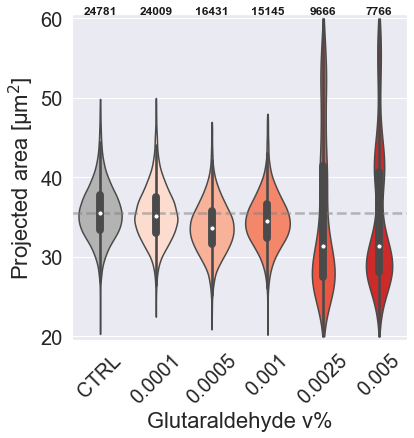

In [62]:
y_para = 'area_um'
fontsize=20
palette = 'Reds'

GA_concentrations = df_GA['GA_concentration'].unique()
plot_order = np.roll(GA_concentrations, 1)

xtick_labels = []
for GA_conc in plot_order:
    if GA_conc == 'CTRL':
        xtick_labels.append(GA_conc)
    else:
        xtick_labels.append(GA_conc[:-2])

fig, ax = plot_violins(df_GA, 'GA_concentration', y_para, fontsize_labels=fontsize, order = plot_order,
                 pal = palette)
ax.set_xlabel("Glutaraldehyde v%", fontsize=fontsize+2)
ax.set_xticklabels(xtick_labels)

ax.set_ylim(19.5,60.5)
ax.set_ylabel('Projected area [µm$^2$]')

# add number of observations per violin
nobs = df_GA['GA_concentration'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
# add it to the plot
pos = range(len(nobs))
text_y_position = 60.5

for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick],
            text_y_position,
            nobs[tick],
            horizontalalignment='center',
            size='medium',
            color='k',
            weight='semibold')

In [63]:
save_name = "fig_S3A_RBC_GA_area"
savepath = os.path.join(savefolder,save_name)
fig.tight_layout()
fig.savefig(savepath+".pdf", dpi=900, format='pdf')

In [46]:
df_GA_ctrl = df_GA[df_GA['GA_concentration'] == 'CTRL']

for concentration in GA_concentrations[:-1]:
    df_GA_concentration = df_GA[df_GA['GA_concentration'] == concentration]
    t_statistic, p_value = ttest_ind(df_GA_ctrl[y_para], df_GA_concentration[y_para],
                                     equal_var=True  # set false, if variance differs
                                     )
    t_statistic_welch, p_value_welch = ttest_ind(df_GA_ctrl[y_para], df_GA_concentration[y_para],
                                                 equal_var=False  # set false, if variance differs
                                                )
    u_statistic, p_value_mwu = mannwhitneyu(df_GA_ctrl[y_para], df_GA_concentration[y_para])

    print("CTRL vs {}:".format(concentration))
    print("Student's t-Test: p-value = {}".format(str(p_value)))
    print("Welch's t-Test: p-value = {}".format(str(p_value_welch)))
    print("Mann-Whitney U-Test: p-value = {} \n".format(str(p_value_mwu)))

CTRL vs 0.0001GA:
Student's t-Test: p-value = 2.7844284632740855e-06
Welch's t-Test: p-value = 2.746432283778954e-06
Mann-Whitney U-Test: p-value = 1.4349170892589852e-07 

CTRL vs 0.0005GA:
Student's t-Test: p-value = 0.0
Welch's t-Test: p-value = 0.0
Mann-Whitney U-Test: p-value = 0.0 

CTRL vs 0.001GA:
Student's t-Test: p-value = 1.676919198288004e-114
Welch's t-Test: p-value = 1.3031285055946236e-112
Mann-Whitney U-Test: p-value = 4.703825217522339e-117 

CTRL vs 0.0025GA:
Student's t-Test: p-value = 4.786711229026727e-11
Welch's t-Test: p-value = 2.338807332910863e-20
Mann-Whitney U-Test: p-value = 1.2603100311581133e-237 

CTRL vs 0.005GA:
Student's t-Test: p-value = 6.379986247763558e-24
Welch's t-Test: p-value = 6.711681312637669e-45
Mann-Whitney U-Test: p-value = 1.4601205734723711e-289 



#### Glutaraldehyde deformation

In [47]:
y_para = 'deform'
fontsize=20
palette = 'Reds'

GA_concentrations = df_GA['GA_concentration'].unique()
plot_order = np.roll(GA_concentrations, 1)

xtick_labels = []
for GA_conc in plot_order:
    if GA_conc == 'CTRL':
        xtick_labels.append(GA_conc)
    else:
        xtick_labels.append(GA_conc[:-2])

fig, ax = plot_violins(df_GA, 'GA_concentration', y_para, fontsize_labels=fontsize, order = plot_order,
                 pal = palette)
ax.set_xlabel("Glutaraldehyde v%", fontsize=fontsize+2)
ax.set_xticklabels(xtick_labels)

# ax.set_ylim(0,0.4)


[Text(0, 0, 'CTRL'),
 Text(1, 0, '0.0001'),
 Text(2, 0, '0.0005'),
 Text(3, 0, '0.001'),
 Text(4, 0, '0.0025'),
 Text(5, 0, '0.005')]

In [48]:
save_name = "fig_S3A_RBC_GA_deform"
savepath = os.path.join(savefolder,save_name)
fig.tight_layout()
fig.savefig(savepath+".pdf", dpi=900, format='pdf')

In [49]:
df_GA_ctrl = df_GA[df_GA['GA_concentration'] == 'CTRL']

for concentration in GA_concentrations[:-1]:
    df_GA_concentration = df_GA[df_GA['GA_concentration'] == concentration]
    t_statistic, p_value = ttest_ind(df_GA_ctrl[y_para], df_GA_concentration[y_para],
                                     equal_var=True  # set false, if variance differs
                                     )
    t_statistic_welch, p_value_welch = ttest_ind(df_GA_ctrl[y_para], df_GA_concentration[y_para],
                                                 equal_var=False  # set false, if variance differs
                                                 )
    u_statistic, p_value_mwu = mannwhitneyu(df_GA_ctrl[y_para], df_GA_concentration[y_para])

    print("CTRL vs {}:".format(concentration))
    print("Student's t-Test: p-value = {}".format(str(p_value)))
    print("Welch's t-Test: p-value = {}".format(str(p_value_welch)))
    print("Mann-Whitney U-Test: p-value = {} \n".format(str(p_value_mwu)))

CTRL vs 0.0001GA:
Student's t-Test: p-value = 1.2615018751718987e-08
Welch's t-Test: p-value = 8.72047663300753e-09
Mann-Whitney U-Test: p-value = 0.00047144660142372575 

CTRL vs 0.0005GA:
Student's t-Test: p-value = 0.04092724214573879
Welch's t-Test: p-value = 0.05044236187512378
Mann-Whitney U-Test: p-value = 0.07185228788606558 

CTRL vs 0.001GA:
Student's t-Test: p-value = 1.0507799465614769e-90
Welch's t-Test: p-value = 1.025441666805357e-85
Mann-Whitney U-Test: p-value = 3.784463510252047e-73 

CTRL vs 0.0025GA:
Student's t-Test: p-value = 0.0
Welch's t-Test: p-value = 0.0
Mann-Whitney U-Test: p-value = 0.0 

CTRL vs 0.005GA:
Student's t-Test: p-value = 0.0
Welch's t-Test: p-value = 0.0
Mann-Whitney U-Test: p-value = 0.0 



## B

In [50]:
diamide_file = "data\RTfDC\RBC\diamide_20201214.tsv"
df_diamide = pd.read_csv(diamide_file, sep='\t')

#### Diamide area

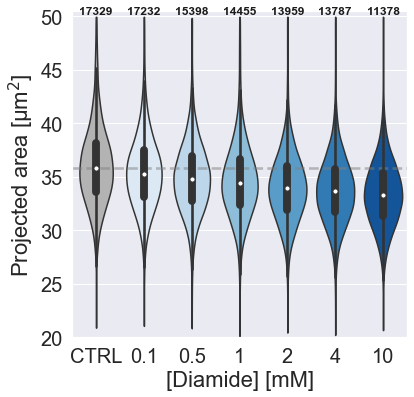

In [51]:
y_para = 'area_um'
fontsize=20
palette = 'Blues'

plot_order = ['CTRL', '0.1mM', '0.5mM', '1mM', '2mM', '4mM', '10mM']

xtick_labels = []
for diamide_conc in plot_order:
    if diamide_conc == 'CTRL':
        xtick_labels.append(diamide_conc)
    else:
        xtick_labels.append(diamide_conc[:-2])

fig, ax = plot_violins(df_diamide, 'diamide_concentration', y_para, fontsize_labels=fontsize, order = plot_order,
                 pal=palette)
ax.set_xlabel("[Diamide] [mM]", fontsize=fontsize+2)
ax.set_xticklabels(xtick_labels)

for tick in ax.get_xticklabels():
    tick.set_rotation(0)

ax.set_ylim(20,50.5)
ax.set_ylabel('Projected area [µm$^2$]')

# add number of observations per violin
nobs = df_diamide['diamide_concentration'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
# add it to the plot
pos = range(len(nobs))
text_y_position = 50.2

for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick],
            text_y_position,
            nobs[tick],
            horizontalalignment='center',
            size='medium',
            color='k',
            weight='semibold')

In [52]:
save_name = "fig_S3B_RBC_diamide_area"
savepath = os.path.join(savefolder,save_name)
fig.tight_layout()
fig.savefig(savepath+".pdf", dpi=900, format='pdf')

In [53]:
df_diamide_ctrl = df_diamide[df_diamide['diamide_concentration'] == 'CTRL']

for concentration in plot_order[1:]:
    df_dia_concentration = df_diamide[df_diamide['diamide_concentration'] == concentration]
    t_statistic, p_value = ttest_ind(df_diamide_ctrl[y_para], df_dia_concentration[y_para],
                                     equal_var=True,  # set false, if variance differs
                                     permutations = 10
                                     )
    t_statistic_welch, p_value_welch = ttest_ind(df_diamide_ctrl[y_para], df_dia_concentration[y_para],
                                                 equal_var=False  # set false, if variance differs
                                                 )
    u_statistic, p_value_mwu = mannwhitneyu(df_GA_ctrl[y_para], df_dia_concentration[y_para])

    print("CTRL vs {}:".format(concentration))
    print("Student's t-Test: p-value = {}".format(str(p_value)))
    print("Welch's t-Test: p-value = {}".format(str(p_value_welch)))
    print("Mann-Whitney U-Test: p-value = {} \n".format(str(p_value_mwu)))

CTRL vs 0.1mM:
Student's t-Test: p-value = 0.0
Welch's t-Test: p-value = 2.1054588408456662e-47
Mann-Whitney U-Test: p-value = 2.9048265022135287e-07 

CTRL vs 0.5mM:
Student's t-Test: p-value = 0.0
Welch's t-Test: p-value = 3.862413764992832e-148
Mann-Whitney U-Test: p-value = 9.99195754096096e-59 

CTRL vs 1mM:
Student's t-Test: p-value = 0.0
Welch's t-Test: p-value = 1.3031072298036893e-209
Mann-Whitney U-Test: p-value = 1.9996023164387413e-118 

CTRL vs 2mM:
Student's t-Test: p-value = 0.0
Welch's t-Test: p-value = 0.0
Mann-Whitney U-Test: p-value = 3.4996699186072744e-281 

CTRL vs 4mM:
Student's t-Test: p-value = 0.0
Welch's t-Test: p-value = 0.0
Mann-Whitney U-Test: p-value = 0.0 

CTRL vs 10mM:
Student's t-Test: p-value = 0.0
Welch's t-Test: p-value = 0.0
Mann-Whitney U-Test: p-value = 0.0 



#### Diamide deformation

(0.095, 0.405)

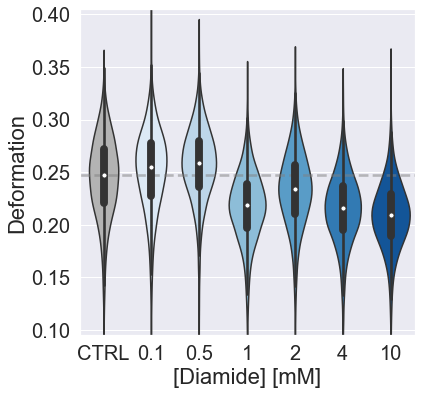

In [56]:
y_para = 'deform'
fontsize=20
palette = 'Blues'

plot_order = ['CTRL', '0.1mM', '0.5mM', '1mM', '2mM', '4mM', '10mM']

xtick_labels = []
for diamide_conc in plot_order:
    if diamide_conc == 'CTRL':
        xtick_labels.append(diamide_conc)
    else:
        xtick_labels.append(diamide_conc[:-2])

fig, ax = plot_violins(df_diamide, 'diamide_concentration', y_para, fontsize_labels=fontsize, order = plot_order,
                 pal=palette)
ax.set_xlabel("[Diamide] [mM]", fontsize=fontsize+2)
ax.set_xticklabels(xtick_labels)

for tick in ax.get_xticklabels():
    tick.set_rotation(0)

ax.set_ylim(.095,.405)


In [57]:
save_name = "fig_S3B_RBC_diamide_deform"
savepath = os.path.join(savefolder,save_name)
fig.tight_layout()
fig.savefig(savepath+".pdf", dpi=900, format='pdf')

In [58]:
df_diamide_ctrl = df_diamide[df_diamide['diamide_concentration'] == 'CTRL']

for concentration in plot_order[1:]:
    df_dia_concentration = df_diamide[df_diamide['diamide_concentration'] == concentration]
    t_statistic, p_value = ttest_ind(df_diamide_ctrl[y_para], df_dia_concentration[y_para],
                                     equal_var=True,  # set false, if variance differs
                                     alternative='two-sided'
                                     )
    t_statistic_welch, p_value_welch = ttest_ind(df_diamide_ctrl[y_para], df_dia_concentration[y_para],
                                                 equal_var=False  # set false, if variance differs
                                                 )
    u_statistic, p_value_mwu = mannwhitneyu(df_GA_ctrl[y_para], df_dia_concentration[y_para])

    print("CTRL vs {}:".format(concentration))
    print("Student's t-Test: p-value = {}".format(str(p_value)))
    print("Welch's t-Test: p-value = {}".format(str(p_value_welch)))
    print("Mann-Whitney U-Test: p-value = {} \n".format(str(p_value_mwu)))

CTRL vs 0.1mM:
Student's t-Test: p-value = 2.0925230171104583e-22
Welch's t-Test: p-value = 1.0777660570381e-22
Mann-Whitney U-Test: p-value = 5.7205627596211564e-154 

CTRL vs 0.5mM:
Student's t-Test: p-value = 3.6480616296249084e-129
Welch's t-Test: p-value = 4.851252288807842e-127
Mann-Whitney U-Test: p-value = 5.25504985879176e-303 

CTRL vs 1mM:
Student's t-Test: p-value = 0.0
Welch's t-Test: p-value = 0.0
Mann-Whitney U-Test: p-value = 0.0 

CTRL vs 2mM:
Student's t-Test: p-value = 1.2390951373007545e-142
Welch's t-Test: p-value = 6.881956795247075e-139
Mann-Whitney U-Test: p-value = 2.2438273524837306e-18 

CTRL vs 4mM:
Student's t-Test: p-value = 0.0
Welch's t-Test: p-value = 0.0
Mann-Whitney U-Test: p-value = 0.0 

CTRL vs 10mM:
Student's t-Test: p-value = 0.0
Welch's t-Test: p-value = 0.0
Mann-Whitney U-Test: p-value = 0.0 

